In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import nltk
from textblob import TextBlob
from textblob.translate import Translator
from textblob.sentiments import NaiveBayesAnalyzer


In [2]:
# nltk.download()

In [3]:
with open(file = "poems proyect.txt", mode = "r", encoding = "latin-1") as file: 
    texto = file.read()
    
texto = texto.lower()

print(texto)




anonymous.


1. _madrigal._

love not me for comely grace,
for my pleasing eye or face;
nor for any outward part,
no, nor for my constant heart:
      for those may fail or turn to ill,
        so thou and i shall sever:
keep therefore a true woman's eye,
and love me still, but know not why;
      so hast thou the same reason still
        to doat upon me ever.

                         




matthew arnold.


2. _the forsaken merman._

come, dear children, let us away;
    down and away below.
now my brothers call from the bay;
now the great winds shorewards blow;
now the salt tides seawards flow;
now the wild white horses play,
champ and chafe and toss in the spray.
    children dear, let us away.
        this way, this way.

call her once before you go.
    call once yet.
in a voice that she will know:
    "margaret! margaret!"
children's voices should be dear
(call once more) to a mother's ear:
children's voices, wild with pain.
    surely she will come again.
call her once and c

In [4]:
tokens = nltk.word_tokenize(text = texto, language = "english")


for token in tokens[:5]: 
    print(token, type(token))

anonymous <class 'str'>
. <class 'str'>
1 <class 'str'>
. <class 'str'>
_madrigal._ <class 'str'>


In [5]:
def stopWords_clean(texto):
    tokens = nltk.word_tokenize(text = texto, language = "english")
    texto_nltk = nltk.Text(tokens)

    distribucion = nltk.FreqDist(samples = texto_nltk)
    distribucion.plot(20)
    plt.show()
    
    stopwords = nltk.corpus.stopwords.words("english")
    newStopWords = ["'s","'d","-","o.", "er","1.f.3","...","xiii"]
    stopwords.extend(newStopWords)
    
    tokens = nltk.word_tokenize(text = texto, language = "english")
   

    tokens_limpios = list() 

    tokens = [token.lower( ) for token in tokens]

    for token in tokens: 
        if token not in stopwords: 
            tokens_limpios.append(token)

    print(f"Tamaño original: {len(tokens)}") 
    print(f"Tamaño despues de stopwords: {len(tokens_limpios)}")
    
    nltk.FreqDist(nltk.Text(tokens_limpios)).plot(20)
    plt.show()
    
    
    # Eliminamos elementos de tamaño 1 o menor:

    tokens_limpios = list()

    for token in tokens: 
        if token not in stopwords: 
            if len(token) > 2: 
                tokens_limpios.append(token)

    print(len(tokens_limpios))
    
    nltk.FreqDist(nltk.Text(tokens_limpios)).plot(20)
    plt.show()
    print(tokens_limpios)
    
    return tokens_limpios

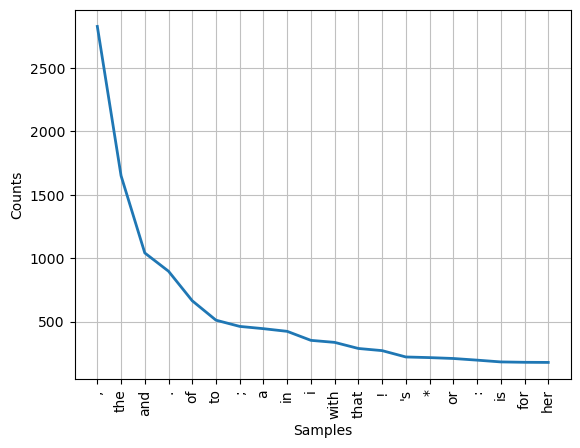

Tamaño original: 33022
Tamaño despues de stopwords: 20902


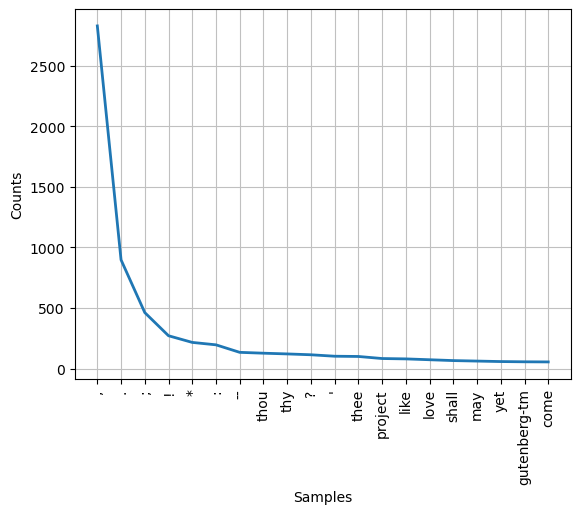

15131


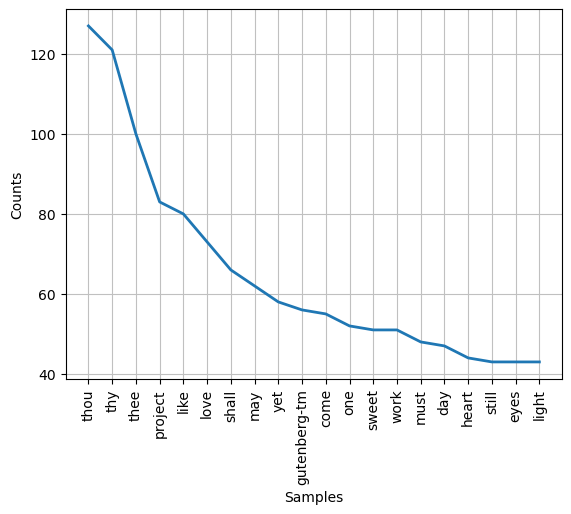

['anonymous', '_madrigal._', 'love', 'comely', 'grace', 'pleasing', 'eye', 'face', 'outward', 'part', 'constant', 'heart', 'may', 'fail', 'turn', 'ill', 'thou', 'shall', 'sever', 'keep', 'therefore', 'true', 'woman', 'eye', 'love', 'still', 'know', 'hast', 'thou', 'reason', 'still', 'doat', 'upon', 'ever', 'matthew', 'arnold', '_the', 'forsaken', 'merman._', 'come', 'dear', 'children', 'let', 'away', 'away', 'brothers', 'call', 'bay', 'great', 'winds', 'shorewards', 'blow', 'salt', 'tides', 'seawards', 'flow', 'wild', 'white', 'horses', 'play', 'champ', 'chafe', 'toss', 'spray', 'children', 'dear', 'let', 'away', 'way', 'way', 'call', 'call', 'yet', 'voice', 'know', 'margaret', 'margaret', 'children', 'voices', 'dear', 'call', 'mother', 'ear', 'children', 'voices', 'wild', 'pain', 'surely', 'come', 'call', 'come', 'away', 'way', 'way', 'mother', 'dear', 'stay', 'wild', 'white', 'horses', 'foam', 'fret', 'margaret', 'margaret', 'come', 'dear', 'children', 'come', 'away', 'call', 'one', 

In [6]:
tokens_limpios=stopWords_clean(texto)

In [7]:
from nltk.tokenize import sent_tokenize

frases = sent_tokenize(text = texto) # Crea tokens de oranciones 
frases

['\n\n\nanonymous.',
 '1.',
 "_madrigal._\n\nlove not me for comely grace,\nfor my pleasing eye or face;\nnor for any outward part,\nno, nor for my constant heart:\n      for those may fail or turn to ill,\n        so thou and i shall sever:\nkeep therefore a true woman's eye,\nand love me still, but know not why;\n      so hast thou the same reason still\n        to doat upon me ever.",
 'matthew arnold.',
 '2.',
 '_the forsaken merman._\n\ncome, dear children, let us away;\n    down and away below.',
 'now my brothers call from the bay;\nnow the great winds shorewards blow;\nnow the salt tides seawards flow;\nnow the wild white horses play,\nchamp and chafe and toss in the spray.',
 'children dear, let us away.',
 'this way, this way.',
 'call her once before you go.',
 'call once yet.',
 'in a voice that she will know:\n    "margaret!',
 'margaret!"',
 "children's voices should be dear\n(call once more) to a mother's ear:\nchildren's voices, wild with pain.",
 'surely she will come 

In [8]:
total_palabras = len(tokens)

print(f"Total de palabras en el texto: {total_palabras}")

palabras_diferentes = len(set(tokens))

print(f"Total de palabras diferentes en el texto: {palabras_diferentes}")

Total de palabras en el texto: 33022
Total de palabras diferentes en el texto: 5717


In [9]:
# n_poblacion = 50
# n_genes = 6
p_cruce = 0.9
p_mutacion = 0.05

In [10]:
# n_poblacion =input("Dame el numero de lineas que quieres que sea multiplo de 4:  ")
# n_genes =input("Dame el numero de palabras por linea: " )
# tipo_rima =input("Dime que tipo de rima quieres (Asonante=A , Consonante=C): ")

# # La polaridad es el sentimiento mismo, que va de -1 a +1. La subjetividad es una medida del 
# # sentimiento siendo objetivo a subjetivo, y va de 0 a 1. Preferimos ver el sentimiento que es 
# # objetivo que subjetivo, así que una puntuación más baja probablemente denote una lectura más precisa.
# polaridad=input("¿Qué tipo de sentiminto  quieres?MP=Muy Positivo(>0.8) , P=Positivo(>0.5), N=Negativo(<0.5), MN=Muy Negativo(<0.8): ")

# tema=input("Dame una palabra sobre el tema del poema: ")
# analysis = TextBlob(tema)
# tema_en=analysis.translate(to="en")

# # TRADUCIR: print(analysis.translate(to="es"))

In [11]:
n_poblacion =12
n_genes =6
tipo_rima ="A"

# La polaridad es el sentimiento mismo, que va de -1 a +1. La subjetividad es una medida del 
# sentimiento siendo objetivo a subjetivo, y va de 0 a 1. Preferimos ver el sentimiento que es 
# objetivo que subjetivo, así que una puntuación más baja probablemente denote una lectura más precisa.

polaridad="P"
tema="amor"

# traducimos el TEMA a ingles
t = Translator()
tema_en=t.translate(tema, from_lang='es', to_lang='en')
tema_en=tema_en.lower()
print(tema_en)




love


In [12]:
palabras_unicas=set(tokens)


In [13]:
peso_objetos=list()

analysis = TextBlob("embarrassed")
peso_objetos.append(analysis.sentiment)
peso_objetos

[Sentiment(polarity=0.0, subjectivity=0.0)]

In [14]:
data=pd.DataFrame(columns=palabras_unicas)
data

,mould'ring,unlike,paternal,snowy,marriage,english,waterfall,love-adept,size,moping,...,complete,quaint-enamelled,defects,pleasing,mouth,unsufferable,satisfy,b.,death-moth,lubber-fiend


In [15]:
lista_individuos=[]
contad=0
posicion_tema_en=random.randint(0,n_genes-1)


for i in (range(0, len(palabras_unicas))): 
    if data.columns[i]==tema_en:
        posicion_columna=i
        
for j in range(n_poblacion):
    data.loc[j]=0
    individuo_p = random.sample(range(0, len(palabras_unicas)), n_genes)
   
    if j==0:
        individuo_p[posicion_tema_en]=posicion_columna
    print(individuo_p)
    for i in individuo_p:   
        data.iloc[j,i]=1
        
        
        
def crear_individuo(linea):
    indiviuo_nuevo = random.sample(range(0, len(palabras_unicas)), n_genes)
    data.iloc[linea]=0
    for i in indiviuo_nuevo:   
        data.iloc[linea,i]=1
    return indiviuo_nuevo    
        
        

        

[3000, 2985, 5302, 3360, 1905, 5674]
[2817, 2605, 2303, 704, 175, 5576]
[2759, 1201, 4352, 3305, 818, 3254]
[3715, 4034, 4950, 2110, 4789, 627]
[719, 3210, 4955, 3171, 4864, 2371]
[4426, 1786, 889, 3113, 3229, 3573]
[249, 1847, 2710, 1198, 663, 1601]
[2509, 2700, 3460, 1440, 2778, 2483]
[5333, 3890, 2613, 5193, 388, 331]
[648, 4249, 906, 2567, 687, 2317]
[4414, 2370, 4738, 911, 3116, 3582]
[5653, 4752, 4158, 4909, 5688, 4297]


In [16]:
lista_poema=list()

for j in range(n_poblacion):
    
    for i in (range(0, len(palabras_unicas))):        
        if data.iloc[j,i]!=0:    
            lista_poema.append(data.columns[i])
        
    lista_poema.append(".")
    
poema=" ".join(lista_poema)

print(poema)

# SENTIMIENTO
blob = TextBlob(poema, analyzer = NaiveBayesAnalyzer())
for sent in blob.sentences:
    print(sent.sentiment)

    
if  polaridad=="MP":
    polar=0.75
if  polaridad=="P":
    polar=0.5
if  polaridad=="N":
    polar=0.5
if  polaridad=="MN":
    polar=0.75    
    
contador_linea=1   
lista_nueva_linea=list()    
linea_nueva=""

if polaridad=="MP" or polaridad=="P":
    for sent in blob.sentences[1:]:
        peso_pos=sent.sentiment[1] 
    
        
        while  polar>peso_pos:
            indiviuo_nuevo=crear_individuo(contador_linea)
            linea_nueva=""
            lista_nueva_linea=list()
            
            for i in (range(0, len(palabras_unicas))):
                
                if data.iloc[contador_linea,i]!=0:    
                    lista_nueva_linea.append(data.columns[i])
            linea_nueva=" ".join(lista_nueva_linea)
            print(linea_nueva)

            blob_nuevo = TextBlob(linea_nueva, analyzer = NaiveBayesAnalyzer())
            peso_pos=blob_nuevo.sentences[0].sentiment[1]       
            
        contador_linea+=1
   
    
else:
    for sent in blob.sentences[1:]:
        peso_pos=sent.sentiment[2] 
        
        
        while polar>peso_pos:
            indiviuo_nuevo=crear_individuo(contador_linea)
            linea_nueva=""
            lista_nueva_linea=list()            
            
            for i in (range(0, len(palabras_unicas))):        
                if data.iloc[contador_linea,i]!=0:    
                    lista_nueva_linea.append(data.columns[i])
            linea_nueva=" ".join(lista_nueva_linea)
            print(linea_nueva)
            
            blob_nuevo = TextBlob(linea_nueva, analyzer = NaiveBayesAnalyzer())
            peso_pos=blob_nuevo.sentences[0].sentiment[2]       
            
        contador_linea+=1
        

doors forward merchant love follow mountains . murmurs youngest-teemed anonymous hath car shearers . harp antique _1813 bee-mouth ivy flee . tolls compel trance mine went melancholy . fruitfulness 94 cell lucky sky visage . pillars latin most fatal 2 than . sometimes reward temple locks redemption length . sleeping entire rill noon-day monumental suck . consent ragged eloquent $ bourn pourest . ding-dong girl purple weight apron sun . dolphins sensual mississippi mislead amaryllis furrowed . cheat longing lycidas arises doffed breaking .
Sentiment(classification='neg', p_pos=0.4667340731687478, p_neg=0.5332659268312514)
Sentiment(classification='neg', p_pos=0.2736389684813754, p_neg=0.7263610315186256)
Sentiment(classification='neg', p_pos=0.3571428571428584, p_neg=0.6428571428571437)
Sentiment(classification='pos', p_pos=0.9930195040769124, p_neg=0.006980495923087064)
Sentiment(classification='pos', p_pos=0.8998925501432672, p_neg=0.1001074498567335)
Sentiment(classification='pos', p_

In [17]:
lista_poema=list()
poema=""
for j in range(n_poblacion):
    
    for i in (range(0, len(palabras_unicas))):        
        if data.iloc[j,i]!=0:    
            lista_poema.append(data.columns[i])
        
    lista_poema.append(".")
    
poema=" ".join(lista_poema)

print(poema)

blob = TextBlob(poema, analyzer = NaiveBayesAnalyzer())
for sent in blob.sentences:
    print(sent.sentiment)

doors forward merchant love follow mountains . base _hohenlinden._ circle touching pensive outside . sea cry sovereign judge rave wrapt . tolls compel trance mine went melancholy . fruitfulness 94 cell lucky sky visage . pillars latin most fatal 2 than . sometimes reward temple locks redemption length . death-pale heathy prophet specific village-hampden flight . consent ragged eloquent $ bourn pourest . ding-dong girl purple weight apron sun . shuns kings stronger requires sways tune . cheat longing lycidas arises doffed breaking .
Sentiment(classification='neg', p_pos=0.4667340731687478, p_neg=0.5332659268312514)
Sentiment(classification='pos', p_pos=0.8961772235397603, p_neg=0.10382277646024063)
Sentiment(classification='pos', p_pos=0.8897438711851274, p_neg=0.1102561288148745)
Sentiment(classification='pos', p_pos=0.9930195040769124, p_neg=0.006980495923087064)
Sentiment(classification='pos', p_pos=0.8998925501432672, p_neg=0.1001074498567335)
Sentiment(classification='pos', p_pos=0

In [18]:
#  for i in (range(0, len(palabras_unicas))): 
#     if data.columns[i]==tema_en:
#         print(i)

In [19]:
def transformar_array_a_poema(data):

    lista_poema=list()

    for j in range(n_poblacion):

        for i in (range(0, len(palabras_unicas))):        
            if data.iloc[j,i]!=0:    
                lista_poema.append(data.columns[i])

        lista_poema.append(".")

    poema=" ".join(lista_poema)

    return poema

In [20]:
# individuo=pd.DataFrame(data.iloc[4]).T
# # individuo.columns[5]
# individuo.iloc[0,5]

# Medimos los sentimientos

# PESO sentimientos

In [21]:
# if  polaridad=="MP":
#     polar=0.8
# if  polaridad=="P":
#     polar=0.5
# if  polaridad=="N":
#     polar=0.5
# if  polaridad=="MN":
#     polar=0.8

In [22]:
# if polaridad=="MP" or polaridad=="P":
#     peso_pos=[sent.sentiment[1] for sent in blob.sentences]
#     print(peso_pos)
# else:
#     peso_pos=[sent.sentiment[2] for sent in blob.sentences]
#     print(peso_pos)

In [23]:
# blob

In [24]:
# blob.sentences[0].sentiment[1]

# VALOR palabras

In [25]:
# Buscamos palabras similares
idx = nltk.text.ContextIndex(tokens = tokens_limpios)
palabras_similares = idx.similar_words(word = tema_en)
palabras_similares.append(tema_en)
palabras_similares

['strong', 'well', 'goddess', 'lot', 'spared', 'love']

In [26]:
valor_palabras=list()
for i in range(len(palabras_unicas)):
    if data.columns[i] in palabras_similares:
        valor_palabras.append(5)
    else:
        valor_palabras.append(1)
valor_palabras

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [27]:
valor_palabras.count(5)

6

In [28]:
individuo=data.iloc[0].tolist()
np.dot(individuo, valor_palabras)

10

In [29]:
poblacion=data.copy()
poblacion

,mould'ring,unlike,paternal,snowy,marriage,english,waterfall,love-adept,size,moping,...,complete,quaint-enamelled,defects,pleasing,mouth,unsufferable,satisfy,b.,death-moth,lubber-fiend
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
lista_poblacion=np.array(poblacion)
valor_poblacion = [np.dot(individuo, valor_palabras) for individuo in lista_poblacion]
print(valor_poblacion)

[10, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


In [31]:
def calcular_peso(individuo):
   
    lista_poema=list()
    individuo_array=np.array(individuo)
    individuo=pd.DataFrame(individuo_array,data.columns).T
#     display(individuo)
    for i in (range(0, len(palabras_unicas))):        
        if individuo.iloc[0,i]!=0:
            lista_poema.append(data.columns[i])
               
    poema_ind=" ".join(lista_poema)
 
    blob = TextBlob(poema_ind, analyzer = NaiveBayesAnalyzer())
    print("blob.sentences:  ",blob.sentences)
    peso_individuo = blob.sentences[0].sentiment[1]

    
    if polaridad=="MP" or polaridad=="P":
        return peso_individuo
    else:
        return 1-peso_individuo
        
    
def calcular_fitness(individuo):
    fitness_individuo=np.dot(np.array(individuo), valor_palabras)
    return fitness_individuo


def calcular_peso_poblacion(poblacion):
    lista_poema=list()

    for j in range(n_poblacion):

        for i in (range(0, len(palabras_unicas))):        
            if data.iloc[j,i]!=0:
                lista_poema.append(data.columns[i])
        lista_poema.append(".")

    poema=" ".join(lista_poema)
    blob = TextBlob(poema, analyzer = NaiveBayesAnalyzer())
    peso_poblacion=[sent.sentiment[1] for sent in blob.sentences]
    
    return peso_poblacion

    
def cacular_fitness_poblacion(poblacion_array):
#     poblacion_array=np.array(poblacion)
    fitness_poblacion = [np.dot(individuo, valor_palabras) for individuo in poblacion_array]
    
    return  fitness_poblacion

# Elegimos padres

In [32]:
def  elegir_padres(poblacion_array):
    tres_aleatorios_papa,tres_aleatorios_mama,lista_reproductor_papa,lista_reproductor_mama=[],[],[],[]
#     poblacion_array=np.array(poblacion)
    
    for i in range(3):
        tres_aleatorios_papa.append(random.randint(0,len(poblacion_array)-1))
        tres_aleatorios_mama.append(random.randint(0,len(poblacion_array)-1))
        
    for indv in tres_aleatorios_papa:
        lista_reproductor_papa.append(poblacion_array[indv])
        print(indv)
        
    for indv in tres_aleatorios_mama:   
        lista_reproductor_mama.append(poblacion_array[indv])
        print(indv)

    
    papa_posicion=tres_aleatorios_papa[np.argmax(cacular_fitness_poblacion(lista_reproductor_papa))]
    print("POSICION papa: ",papa_posicion)
    papa_poblacion=poblacion_array[papa_posicion]
    
    
    mama_posicion=tres_aleatorios_mama[np.argmax(cacular_fitness_poblacion(lista_reproductor_mama))]
    print("POSICION mama: ",mama_posicion)
    mama_poblacion=poblacion_array[mama_posicion]
    
    return  papa_poblacion, mama_poblacion

In [33]:
# tres_aleatorios_papa,tres_aleatorios_mama,lista_reproductor_papa,lista_reproductor_mama=[],[],[],[]
# poblacion_array=np.array(poblacion)

# for i in range(3):       
#         tres_aleatorios_mama.append(random.randint(0,len(poblacion_array)-1))
        
# for indv in tres_aleatorios_mama:   
#         lista_reproductor_mama.append(poblacion_array[indv])
#         print(indv)
        
# print(np.argmax(cacular_fitness_poblacion(lista_reproductor_mama)))
# posicion=tres_aleatorios_mama[np.argmax(cacular_fitness_poblacion(lista_reproductor_mama))]
# print(posicion)
# mama_poblacion=poblacion_array[posicion]

In [34]:
def cruzar_padres(poblacion_array):
#     poblacion_array=np.array(poblacion)
    n_genes_count_papa=0
    n_genes_count_mama=0
    
    papa_poblacion,mama_poblacion=elegir_padres(poblacion_array)
#     papa_poblacion=papa_poblacion[0]
#     mama_poblacion=mama_poblacion[0]
    hijo1=[0 for i in  range(len(palabras_unicas))]
    hijo2=[0 for i in  range(len(palabras_unicas))]
    
#     corte=random.randint(0,len(palabras_unicas)-1)
    
#     Probabilidad de que  se apareen  con exito
    if random.randint(0,100)<p_cruce*1000:
        
        for i in range(len(palabras_unicas)-1) :
            
            if n_genes_count_papa<int(n_genes/2):
                if papa_poblacion[i]!=0:
                    
                    n_genes_count_papa+=1
                    hijo1[i]=papa_poblacion[i]

            if n_genes_count_papa>=int(n_genes/2) and n_genes_count_papa<n_genes:        
                if papa_poblacion[i]!=0:
                    
                    n_genes_count_papa+=1
                    hijo2[i]=papa_poblacion[i]
                    
             
            if n_genes_count_mama<int(n_genes/2):
                if mama_poblacion[i]!=0:
                    
                    n_genes_count_mama+=1
                    hijo2[i]=mama_poblacion[i]

            if n_genes_count_mama>=int(n_genes/2) and n_genes_count_mama<n_genes:        
                if mama_poblacion[i]!=0:
                    
                    n_genes_count_mama+=1
                    hijo1[i]=mama_poblacion[i]
        
#            comprabamos que nunca  sea mayor a n_genes
#             if n_genes_count_papa>n_genes | n_genes_count_mama>n_genes:
#                 hijo2[i]=0
#             else:
#                  hijo2[i]=papa_poblacion[i]
#                  if papa_poblacion[i]!=0:
#                      n_genes_count_papa+=1
                    
#             if n_genes_count_mama>n_genes:
#                 hijo1[i]=0
#             else:
#                  hijo1[i]=mama_poblacion[i]
#                  if mama_poblacion[i]!=0:
#                      n_genes_count_mama+=1
                
    else:
        
        print("Lo siento no hubo suerte...try again!")
        return cruzar_padres(poblacion_array)
    
        
    if random.randint(0,100)<p_mutacion*10:
        print("MUTACION DE GENES!!")
        x=random.randint(0,len(palabras_unicas)-1)
        y=random.randint(0,len(palabras_unicas)-1)
        
        if hijo1[x]==0:
            hijo1[x]=1
        else:
            hijo1[x]=0

        if hijo2[y]==0:
            hijo2[y]=1
        else:
            hijo2[y]=0
    
#     COMPROBAMOS QUE EL PESO(sentimiento)  siempre sea el que necesitamos MAYOR AL POLAR

    if calcular_peso(hijo1)>polar  and calcular_peso(hijo2)>polar:     
        return hijo1,hijo2
    else:
        return hijo1,hijo2
#         cruzar_padres(poblacion_array)
    
    
    
          
# p_cruce = 0.9
# p_mutacion = 0.1

In [35]:
# corte=random.randint(0,len(palabras_unicas))
# corte

In [36]:
def mete_saca(poblacion_array):
    
    tres_aleatorios_papa,tres_aleatorios_mama,lista_reproductor_papa,lista_reproductor_mama=[],[],[],[]

    hijo1,hijo2=cruzar_padres(poblacion_array)
    
    for i in range(2):
        tres_aleatorios_papa.append(random.randint(1,len(poblacion_array)-1))
        tres_aleatorios_mama.append(random.randint(1,len(poblacion_array)-1))
        
    for indv in tres_aleatorios_papa:
        lista_reproductor_papa.append(poblacion_array[indv])
        
    for indv in tres_aleatorios_mama:   
        lista_reproductor_mama.append(poblacion_array[indv])
    

    saca_papa=tres_aleatorios_papa[np.argmin(cacular_fitness_poblacion(lista_reproductor_papa))]
   
    poblacion_array[saca_papa]=hijo1
    
    saca_mama=tres_aleatorios_mama[np.argmin(cacular_fitness_poblacion(lista_reproductor_mama))]
   
    
    if saca_mama!=saca_papa:
        poblacion_array[saca_mama]=hijo2
    else:
        poblacion_array[tres_aleatorios_mama[1]]=hijo2
          
        
    return poblacion_array

# RIMAS

In [37]:
def find_rhyming_word_asonante(word, words_list):
    lista_palabras_rima_asonante=list()
    vowels = set('aeiou')
    word_vowels = [c for c in word if c in vowels]
    for w in words_list:
        w_vowels = [c for c in w if c in vowels]
        if len(word_vowels) == len(w_vowels) and all(a == b for a, b in zip(word_vowels, w_vowels)):
            lista_palabras_rima_asonante.append(w)
    return lista_palabras_rima_asonante

# Define una lista de palabras
# words = list(data.columns)

# # Encuentra una palabra que tenga una rima asonante 
# lista_palabras_rima_asonante = find_rhyming_word_asonante("love", words)

# # Imprime el resultado
# # print(lista_palabras_rima_asonante)
# # Output: None

In [38]:
def find_rhyming_word_consonante(word, words_list):
    lista_palabras_rima_consonante=list()
    
    for w in words_list:
        if len(w)>=3:
            if len(word[-3:]) == len(w[-3:]) and all(a == b for a, b in zip(word[-3:], w[-3:])):
                lista_palabras_rima_consonante.append(w)
    return lista_palabras_rima_consonante



# EJECUTAMOS

In [39]:
poblacion_array=np.array(poblacion)

In [40]:
calcular_peso_poblacion(poblacion)

[0.4667340731687478,
 0.8961772235397603,
 0.8897438711851274,
 0.9930195040769124,
 0.8998925501432672,
 0.5347431045867257,
 0.6128499646068932,
 0.7693452380952371,
 0.833333333333334,
 0.8128058096829175,
 0.6856872727272709,
 0.9129130828429154]

# HACEMOS QUE TRABAJE  Y BUSQUE  LAS MEJORES COMBINACIONES GENETICAS

In [41]:
lista_indiv=[]
poblacion_array=np.array(poblacion)

for i in range(5):
    
    poblacion_array=mete_saca(poblacion_array)   
    
poblacion=pd.DataFrame(data=poblacion_array,columns=data.columns)
poema=transformar_array_a_poema(poblacion)



11
0
3
8
10
0
POSICION papa:  0
POSICION mama:  0
blob.sentences:   [Sentence("doors forward merchant love follow")]
5
9
3
7
1
9
POSICION papa:  3
POSICION mama:  7
blob.sentences:   [Sentence("doors forward merchant prophet specific village-hampden")]
1
6
9
9
10
1
POSICION papa:  1
POSICION mama:  9
blob.sentences:   [Sentence("base purple weight apron _hohenlinden._ circle")]
blob.sentences:   [Sentence("ding-dong girl purple circle touching pensive")]
1
1
9
3
0
0
POSICION papa:  1
POSICION mama:  0
blob.sentences:   [Sentence("base merchant love _hohenlinden._ circle follow")]
blob.sentences:   [Sentence("doors forward merchant circle touching pensive")]
10
4
11
8
0
8
POSICION papa:  10
POSICION mama:  0
blob.sentences:   [Sentence("doors forward merchant love follow")]


In [42]:
cacular_fitness_poblacion(poblacion_array)

[10, 6, 10, 5, 6, 9, 6, 10, 9, 6, 6, 6]

In [43]:
calcular_peso_poblacion(poblacion)

[0.4667340731687478,
 0.8961772235397603,
 0.8897438711851274,
 0.9930195040769124,
 0.8998925501432672,
 0.5347431045867257,
 0.6128499646068932,
 0.7693452380952371,
 0.833333333333334,
 0.8128058096829175,
 0.6856872727272709,
 0.9129130828429154]

In [44]:
def coger_palabra_asonante(frase):
    palabras=frase.split(" ")
    ultima_palabra=palabras[-2]
    print(ultima_palabra)
    
    words_list=data.columns
    lista_palabras_rima_asonante = find_rhyming_word_asonante(ultima_palabra,words_list)

    palabra_elegida=lista_palabras_rima_asonante[random.randint(0,len(lista_palabras_rima_asonante)-1)]
    print("palabra_elegida: " ,palabra_elegida)
    return palabra_elegida

def coger_palabra_consonante(frase):
    palabras=frase.split(" ")
    ultima_palabra=palabras[-2]
    print(ultima_palabra)
    
    words_list=data.columns
    lista_palabras_rima_consonante = find_rhyming_word_consonante(ultima_palabra,words_list)

    palabra_elegida=lista_palabras_rima_consonante[random.randint(0,len(lista_palabras_rima_consonante)-1)]
    print("palabra_elegida: " ,palabra_elegida)
    return palabra_elegida    

In [45]:
def remplazar_palabra(frases,pos,palabra):
    frases[pos].split(" ")[-2]
    frases[pos]=frases[pos].replace(frases[pos].split(" ")[-2],palabra)
   
    return frases

In [46]:
# frases=remplazar_palabra(poema,2,"palabra")

In [47]:
poema

'doors forward merchant love follow mountains . base _hohenlinden._ circle touching pensive outside . death-pale heathy merchant prophet love follow . doors forward merchant circle touching . fruitfulness 94 cell lucky sky visage . doors forward merchant love follow . base purple weight apron _hohenlinden._ circle . base merchant love _hohenlinden._ circle follow . doors forward merchant love follow . ding-dong girl purple weight apron sun . doors forward merchant circle touching pensive . cheat longing lycidas arises doffed breaking .'

In [48]:
frases = sent_tokenize(text = poema)

In [49]:
frases

['doors forward merchant love follow mountains .',
 'base _hohenlinden._ circle touching pensive outside .',
 'death-pale heathy merchant prophet love follow .',
 'doors forward merchant circle touching .',
 'fruitfulness 94 cell lucky sky visage .',
 'doors forward merchant love follow .',
 'base purple weight apron _hohenlinden._ circle .',
 'base merchant love _hohenlinden._ circle follow .',
 'doors forward merchant love follow .',
 'ding-dong girl purple weight apron sun .',
 'doors forward merchant circle touching pensive .',
 'cheat longing lycidas arises doffed breaking .']

In [50]:
if tipo_rima=="A":
       
    for i in range(0,n_poblacion-1,4):
        
        tipo_rimas_posicion=random.randint(0,2)
        print("tipo_rimas_posicion:", tipo_rimas_posicion)
        
    #     AABB
        if tipo_rimas_posicion==0:
            print("AABB")
            palabra_elegida_A=coger_palabra_asonante(frases[i+0])
            frases=remplazar_palabra(frases,i+1,palabra_elegida_A)
            palabra_elegida_B=coger_palabra_asonante(frases[i+2])
            frases=remplazar_palabra(frases,i+3,palabra_elegida_B)

    #     ABBA
        elif tipo_rimas_posicion==1:
            print("ABBA")
            palabra_elegida_A=coger_palabra_asonante(frases[i+0])
            palabra_elegida_B=coger_palabra_asonante(frases[i+1])
            frases=remplazar_palabra(frases,i+2,palabra_elegida_B)
            frases=remplazar_palabra(frases,i+3,palabra_elegida_A)

    #     ABAB
        else:
            print("ABAB")
            palabra_elegida_A=coger_palabra_asonante(frases[i+0])
            palabra_elegida_B=coger_palabra_asonante(frases[i+1])
            frases=remplazar_palabra(frases,i+2,palabra_elegida_A)
            frases=remplazar_palabra(frases,i+3,palabra_elegida_B)
    poema=frases
    frases
    
#     for pal in  frases:
#         palabras=pal.split(" ")
#         ultima_palabra=palabras[-2]
#         print(ultima_palabra)        

#         lista_palabras_rima_asonante = find_rhyming_word_asonante(ultima_palabra,words_list)
        
#         palabra_elegida=lista_palabras_rima_asonante[random.randint(0,len(lista_palabras_rima_asonante)-1)]
#         print("palabra_elegida: " ,palabra_elegida)
#         print(lista_palabras_rima_asonante)
        
if tipo_rima=="C":  
    for i in range(0,n_poblacion-1,4):
        
        tipo_rimas_posicion=random.randint(0,2)
        print("tipo_rimas_posicion:", tipo_rimas_posicion)
        
    #     AABB
        if tipo_rimas_posicion==0:
            print("AABB")
            palabra_elegida_A=coger_palabra_consonante(frases[i+0])
            frases=remplazar_palabra(frases,i+1,palabra_elegida_A)
            palabra_elegida_B=coger_palabra_consonante(frases[i+2])
            frases=remplazar_palabra(frases,i+3,palabra_elegida_B)

    #     ABBA
        elif tipo_rimas_posicion==1:
            print("ABBA")
            palabra_elegida_A=coger_palabra_consonante(frases[i+0])
            palabra_elegida_B=coger_palabra_consonante(frases[i+1])
            frases=remplazar_palabra(frases,i+2,palabra_elegida_B)
            frases=remplazar_palabra(frases,i+3,palabra_elegida_A)

    #     ABAB
        else:
            print("ABAB")
            palabra_elegida_A=coger_palabra_consonante(frases[i+0])
            palabra_elegida_B=coger_palabra_consonante(frases[i+1])
            frases=remplazar_palabra(frases,i+2,palabra_elegida_A)
            frases=remplazar_palabra(frases,i+3,palabra_elegida_B)
    poema=frases
    frases
    

tipo_rimas_posicion: 1
ABBA
mountains
palabra_elegida:  fountain
outside
palabra_elegida:  outside
tipo_rimas_posicion: 0
AABB
visage
palabra_elegida:  nightshade
circle
palabra_elegida:  withheld
tipo_rimas_posicion: 1
ABBA
follow
palabra_elegida:  forlorn
sun
palabra_elegida:  bunch


In [51]:
# CON RIMAS
poema=frases
poema

['doors forward merchant love follow mountains .',
 'base _hohenlinden._ circle touching pensive outside .',
 'death-pale heathy merchant prophet love outside .',
 'doors forward merchant circle fountain .',
 'fruitfulness 94 cell lucky sky visage .',
 'doors forward merchant love nightshade .',
 'base purple weight apron _hohenlinden._ circle .',
 'base merchant love _hohenlinden._ circle withheld .',
 'doors forward merchant love follow .',
 'ding-dong girl purple weight apron sun .',
 'doors forward merchant circle touching bunch .',
 'cheat longing lycidas arises doffed forlorn .']

# Corregir y rellenar para hacer frases con sentido

In [52]:
blob = TextBlob(texto)
tags=blob.tags

In [53]:
new_tags_DT = []

for i, (word, tag) in enumerate(tags):
    if tag == 'DT':
        new_tags_DT.append(word.lower())
tags_DT=set(new_tags_DT)    

print (list(tags_DT))

['another', 'this', 'that', 'doth', 'no', 'the', 'every', 'any', 'loth', 'all', 'wroth', 'those', 'half', 'some', 'both', 'either', 'these', 'an', 'a', 'each', 'neither']


In [54]:
new_tags_IN = []

for i, (word, tag) in enumerate(tags):
    if tag == 'IN':
        new_tags_IN.append(word.lower())
tags_IN=set(new_tags_IN)    

print (list(tags_IN))

['aff', 'blind', 'across', 'amaranthus', 'unlike', 'behind', 'although', 'underneath', 'if', 'drown', 'despite', 'about', 'above', 'unto', 'with', 'into', 'till', 'laugh', 'among', 'bear', 'beneath', 'without', "o'er", 'v.', 'under', 'amid', 'lest', 'ah', 'near', 'past', 'while', 'ae', 'throughout', 'because', 'beyond', 'towards', 'before', 'like', 'since', 'within', '_song._', 'provoke', 'bind', 'visitest', 'bound', 'thou', 'ay', 'whether', 'ask', 'between', "o'erlaid", 'by', 'for', 'through', 'toward', 'below', 'nearer', '_to', "'mid", 'of', 'out', 'edmund', 'round', 'breast', 'down', 'bloom', 'at', 'upon', 'outside', 'bid', 'around', 'belie', 'against', 'from', 'oft', 'beside', "whate'er", 'until', "where'er", 'than', 'that', 'though', 'over', 'o', 'in', 'unless', 'so', 'thrown', 'on', 'except', 'length', 'blown', 'off', 'along', 'as', "'d", 'up', 'after', 'ye', 'therefore', 'wherever']


# creamos las frases de las palabras

In [55]:
lista_zzz=[]
for poe  in  poema:

    poem=str(poe)+" zzz "
    lista_zzz.append(poem)
    
poem=str(lista_zzz)
poem

"['doors forward merchant love follow mountains . zzz ', 'base _hohenlinden._ circle touching pensive outside . zzz ', 'death-pale heathy merchant prophet love outside . zzz ', 'doors forward merchant circle fountain . zzz ', 'fruitfulness 94 cell lucky sky visage . zzz ', 'doors forward merchant love nightshade . zzz ', 'base purple weight apron _hohenlinden._ circle . zzz ', 'base merchant love _hohenlinden._ circle withheld . zzz ', 'doors forward merchant love follow . zzz ', 'ding-dong girl purple weight apron sun . zzz ', 'doors forward merchant circle touching bunch . zzz ', 'cheat longing lycidas arises doffed forlorn . zzz ']"

In [56]:
blob_poema = TextBlob(poem)
tags_poema=blob_poema.tags

In [57]:
tags_poema

[('[', 'JJ'),
 ("'doors", 'NNS'),
 ('forward', 'RB'),
 ('merchant', 'VBP'),
 ('love', 'VB'),
 ('follow', 'JJ'),
 ('mountains', 'NNS'),
 ('zzz', 'NN'),
 ('_hohenlinden._', 'NNP'),
 ('circle', 'NN'),
 ('touching', 'VBG'),
 ('pensive', 'JJ'),
 ('outside', 'NN'),
 ('zzz', 'NN'),
 ("'death-pale", 'JJ'),
 ('heathy', 'JJ'),
 ('merchant', 'NN'),
 ('prophet', 'NN'),
 ('love', 'IN'),
 ('outside', 'NN'),
 ('zzz', 'NN'),
 ("'doors", 'NNS'),
 ('forward', 'VBP'),
 ('merchant', 'NN'),
 ('circle', 'NN'),
 ('fountain', 'NN'),
 ('zzz', 'NN'),
 ("'fruitfulness", 'POS'),
 ('94', 'CD'),
 ('cell', 'NN'),
 ('lucky', 'JJ'),
 ('sky', 'JJ'),
 ('visage', 'NN'),
 ('zzz', 'NN'),
 ("'doors", 'NNS'),
 ('forward', 'VBP'),
 ('merchant', 'NN'),
 ('love', 'NN'),
 ('nightshade', 'NN'),
 ('zzz', 'NN'),
 ('purple', 'JJ'),
 ('weight', 'NN'),
 ('apron', 'NN'),
 ('_hohenlinden._', 'NNP'),
 ('circle', 'NN'),
 ('zzz', 'NN'),
 ('merchant', 'NN'),
 ('love', 'NN'),
 ('_hohenlinden._', 'NNP'),
 ('circle', 'NN'),
 ('withheld', 'NN')

In [58]:
# blob_poema = TextBlob(str(poema))
# tags_poema=blob_poema.tags

In [59]:
# tags_poema

In [60]:
new_tag,new_poema = [],[]
list_DT=list(tags_DT)
list_IN=list(tags_IN)


for i, (word, tag) in enumerate(tags_poema):
    if  word!="[" and  word!="]":
   
        if tag == 'NN' or tag == 'NNS' or tag == 'NNP' or tag == 'NNPS':
            DT=list_DT[random.randint(0,len(list_DT)-1)]
            IN=list_IN[random.randint(0,len(list_IN)-1)]

            if word=="zzz" :
                new_poema.append(" . ")
            else:
                if random.randint(0,1)==1: 
                    new_poema.append(IN)
                new_poema.append(DT)
                new_poema.append(word.lower())
        else:
             new_poema.append(word)


print (new_poema)

['from', 'an', "'doors", 'forward', 'merchant', 'love', 'follow', 'those', 'mountains', ' . ', 'this', '_hohenlinden._', 'loth', 'circle', 'touching', 'pensive', 'neither', 'outside', ' . ', "'death-pale", 'heathy', 'length', 'no', 'merchant', 'neither', 'prophet', 'love', 'both', 'outside', ' . ', 'these', "'doors", 'forward', 'these', 'merchant', 'under', 'that', 'circle', 'like', 'those', 'fountain', ' . ', "'fruitfulness", '94', 'any', 'cell', 'lucky', 'sky', 'that', 'visage', ' . ', 'along', 'no', "'doors", 'forward', 'length', 'all', 'merchant', "o'er", 'half', 'love', 'a', 'nightshade', ' . ', 'purple', 'wroth', 'weight', 'amid', 'those', 'apron', 'blown', 'a', '_hohenlinden._', 'o', 'any', 'circle', ' . ', 'whether', 'that', 'merchant', 'each', 'love', 'despite', 'this', '_hohenlinden._', 'each', 'circle', 'so', 'this', 'withheld', ' . ', 'unto', 'those', "'doors", 'forward', 'against', 'neither', 'merchant', 'bound', 'both', 'love', 'bloom', 'either', 'follow', ' . ', "'ding-d

In [61]:
# Sin corregir
new_poema= " ".join(new_poema)
new_poema

"from an 'doors forward merchant love follow those mountains  .  this _hohenlinden._ loth circle touching pensive neither outside  .  'death-pale heathy length no merchant neither prophet love both outside  .  these 'doors forward these merchant under that circle like those fountain  .  'fruitfulness 94 any cell lucky sky that visage  .  along no 'doors forward length all merchant o'er half love a nightshade  .  purple wroth weight amid those apron blown a _hohenlinden._ o any circle  .  whether that merchant each love despite this _hohenlinden._ each circle so this withheld  .  unto those 'doors forward against neither merchant bound both love bloom either follow  .  'ding-dong laugh no girl bound this purple weight apron doth sun  .  doth 'doors forward into another merchant those circle touching bear all bunch  .  'cheat longing lycidas amid no arises doffed forlorn  . "

In [62]:
corregido=TextBlob(new_poema)
corregido=corregido.correct()

print(corregido)

from an 'doors forward merchant love follow those mountains  .  this _hohenlinden._ both circle touching pensive neither outside  .  'death-pale healthy length no merchant neither prophet love both outside  .  these 'doors forward these merchant under that circle like those fountain  .  'trustfulness 94 any cell lucky sky that visage  .  along no 'doors forward length all merchant o'er half love a nightshade  .  purple wrote weight amid those apron blown a _hohenlinden._ o any circle  .  whether that merchant each love despite this _hohenlinden._ each circle so this withheld  .  unto those 'doors forward against neither merchant bound both love bloom either follow  .  'king-long laugh no girl bound this purple weight apron doth sun  .  doth 'doors forward into another merchant those circle touching bear all bunch  .  'cheat longing lycidas amid no arises doffed forlorn  . 


# TOKENIZAMOS

In [63]:
tokens = nltk.word_tokenize(text = str(corregido), language = "english")

In [64]:
frases = sent_tokenize(text = str(corregido)) # Crea tokens de oranciones 
frases

["from an 'doors forward merchant love follow those mountains  .",
 'this _hohenlinden._ both circle touching pensive neither outside  .',
 "'death-pale healthy length no merchant neither prophet love both outside  .",
 "these 'doors forward these merchant under that circle like those fountain  .",
 "'trustfulness 94 any cell lucky sky that visage  .",
 "along no 'doors forward length all merchant o'er half love a nightshade  .",
 'purple wrote weight amid those apron blown a _hohenlinden._ o any circle  .',
 'whether that merchant each love despite this _hohenlinden._ each circle so this withheld  .',
 "unto those 'doors forward against neither merchant bound both love bloom either follow  .",
 "'king-long laugh no girl bound this purple weight apron doth sun  .",
 "doth 'doors forward into another merchant those circle touching bear all bunch  .",
 "'cheat longing lycidas amid no arises doffed forlorn  ."]

# Total de palabras y Palabras únicas

In [65]:
total_palabras = len(tokens)
print(f"Total de palabras en el texto: {total_palabras}")
palabras_diferentes = len(set(tokens))
print(f"Total de palabras diferentes en el texto: {palabras_diferentes}")

Total de palabras en el texto: 139
Total de palabras diferentes en el texto: 73


In [66]:
riqueza_lexica = palabras_diferentes / total_palabras
print(f"Riqueza Lexica: {riqueza_lexica}")

Riqueza Lexica: 0.5251798561151079


In [67]:
for fras in frases:
    print('\033[1m',fras)
    

 from an 'doors forward merchant love follow those mountains  .
 this _hohenlinden._ both circle touching pensive neither outside  .
 'death-pale healthy length no merchant neither prophet love both outside  .
 these 'doors forward these merchant under that circle like those fountain  .
 'trustfulness 94 any cell lucky sky that visage  .
 along no 'doors forward length all merchant o'er half love a nightshade  .
 purple wrote weight amid those apron blown a _hohenlinden._ o any circle  .
 whether that merchant each love despite this _hohenlinden._ each circle so this withheld  .
 unto those 'doors forward against neither merchant bound both love bloom either follow  .
 'king-long laugh no girl bound this purple weight apron doth sun  .
 doth 'doors forward into another merchant those circle touching bear all bunch  .
 'cheat longing lycidas amid no arises doffed forlorn  .


# TRADUCTOR

In [68]:
from translate import Translator
translator=Translator(to_lang="es")

In [69]:

for fras in frases:
    translated_text = translator.translate(fras)
    print('\033[1m',translated_text)

 Desde un 'puertas hacia adelante, el amor del comerciante sigue esas montañas.
 Este _hohenlinden._ tanto círculo tocando pensativo ni exterior.
 "La muerte pálida longitud saludable no hay comerciante ni profeta ama tanto afuera.
 Estas 'puertas adelantan a estos mercaderes bajo ese círculo como esas fuentes.
 'Confianza 94 cualquier célula cielo afortunado que visage .
 A lo largo de ninguna 'puertas hacia adelante longitud todo comerciante o'er medio amor una solanácea.
 Púrpura escribió peso en medio de esos delantales soplado un _hohenlinden._ o cualquier círculo.
 si ese comerciante cada amor a pesar de este _hohenlinden._ cada círculo por lo que esto retenido.
 a esas 'puertas adelante contra ninguno de los mercaderes atados tanto florecen el amor ni siguen.
 "Risa larga del rey, ninguna chica ató este delantal de peso púrpura doth sol.
 doth 'puertas adelante en otro comerciante esos círculo tocando oso todo el grupo.
 'Engañar a los lycidas anhelantes en medio de no surge des